<a href="https://colab.research.google.com/github/s-whynot/BearingFaultMFPT-repo/blob/master/BearingFault_MFPTSTFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import errno, os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from os import listdir
from os.path import isfile, join

import scipy.io as sio
import tables

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AGtuzit2pBA4h179zASCvkQv9ZuyDWym-o0hgRSEMEC7ZXsoIv7cbg
Mounted at /content/drive


MFPT dataset with the Nominal "No Fault" Data
3 Baseline conditions -

1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz


In [ ]:
file_path = 'drive/My Drive/MFPT Fault Data Sets/1 - Three Baseline Conditions/'
onlyfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]
print(onlyfiles)

['baseline_2.mat', 'baseline_3.mat', 'baseline_1.mat']


In [ ]:
#Function for extracting g data array
def arrtolistgdataALT(matarr):
  p11 = matarr['bearing'][:,0]['gs']
  return p11[0]

In [ ]:
#Reading data from folder
merged_G_3BL_data = []
for filename in os.listdir(file_path):
     if filename.endswith('.mat'):
       print(filename)
       datadict = sio.loadmat(os.path.join(file_path, filename))
       time1 = datadict['__header__'][50:]
       Gdata1 = arrtolistgdataALT(datadict)
       merged_G_3BL_data.append(Gdata1)

merged_G_3BL_data = np.vstack(merged_G_3BL_data)

baseline_2.mat
baseline_3.mat
baseline_1.mat


In [ ]:
display(merged_G_3BL_data)
len(merged_G_3BL_data)

array([[ 0.3685337],
       [-0.3983136],
       [-1.303466 ],
       ...,
       [-0.8111974],
       [-0.3338806],
       [-0.4876291]])

1757808

In [ ]:
p1 = datadict['bearing']['sr'].tolist()
psr1 = p1[0][0][0][0]
print("The Sampling Rate in Hz: ", psr1)
p111 = datadict['bearing'][:, 0]['load'].tolist()
print("Baseline Data for a Constant load in lbs: ", p111[0].tolist()[0][0])

The Sampling Rate in Hz:  97656
Baseline Data for a Constant load in lbs:  270


range(0, 9765)

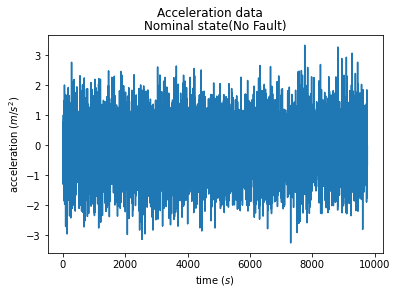

In [ ]:
range_of_samples = range(0, int(psr1/10))
display(range_of_samples)

plt.xlabel("time $(s)$")
plt.ylabel("acceleration $(m/s^2)$")
plt.title('Nominal state(No Fault)')
plt.plot(merged_G_3BL_data[range_of_samples])
plt.suptitle('Acceleration data')
plt.show()

1/10th of a sampling rate of 97656 Hz is 9765.6 Hz or 9.7656 kHz.
Sampling rate is per second.
So plotting done for 1/10th of a second.

MFPT Dataset with 3 Outer Race(OR) Fault conditions - 
1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz

In [ ]:
#The files present in the folder
file_path2 = 'drive/My Drive/MFPT Fault Data Sets/2 - Three Outer Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path2) if isfile(join(file_path2, f))]
print(onlyfiles)

['cyclostat.tif', 'OuterRaceFault_1.mat', 'OuterRaceFault_2.mat', 'OuterRaceFault_3.mat']


In [ ]:
merged_G_3OR_data = []
for filename2 in os.listdir(file_path2):
     if filename2.endswith('.mat'):
       print(filename2)
       datadict2 = sio.loadmat(os.path.join(file_path2, filename2))
       time2 = datadict2['__header__'][50:]
       Gdata2 = arrtolistgdataALT(datadict2)
       merged_G_3OR_data.append(Gdata2)

merged_G_3OR_data = np.vstack(merged_G_3OR_data)

OuterRaceFault_1.mat
OuterRaceFault_2.mat
OuterRaceFault_3.mat


In [ ]:
display(merged_G_3OR_data)
len(merged_G_3OR_data)

array([[ 1.301891 ],
       [-0.6672074],
       [-0.4034944],
       ...,
       [ 0.907281 ],
       [ 2.090778 ],
       [ 1.042275 ]])

1757808

In [ ]:
p2 = datadict2['bearing']['sr'].tolist()
psr2 = p2[0][0][0][0]
print("The Sampling Rate in Hz: ", psr2)

The Sampling Rate in Hz:  97656


MFPT Dataset with 7 Outer Race(OR) conditions - 
1.   Variable load of 25, 50, 100, 150, 200, 250 and 300 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

In [ ]:
#The files present in the folder
file_path3 = 'drive/My Drive/MFPT Fault Data Sets/3 - Seven More Outer Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path3) if isfile(join(file_path3, f))]
print(onlyfiles)

['OuterRaceFault_vload_3.mat', 'OuterRaceFault_vload_2.mat', 'OuterRaceFault_vload_1.mat', 'OuterRaceFault_vload_5.mat', 'OuterRaceFault_vload_4.mat', 'OuterRaceFault_vload_6.mat', 'OuterRaceFault_vload_7.mat']


In [ ]:
merged_G_7OR_data = []
for filename3 in os.listdir(file_path3):
     if filename3.endswith('.mat'):
       print(filename3)
       datadict3 = sio.loadmat(os.path.join(file_path3, filename3))
       time3 = datadict3['__header__'][50:]
       Gdata3 = arrtolistgdataALT(datadict3)
       merged_G_7OR_data.append(Gdata3)

merged_G_7OR_data = np.vstack(merged_G_7OR_data)

OuterRaceFault_vload_3.mat
OuterRaceFault_vload_2.mat
OuterRaceFault_vload_1.mat
OuterRaceFault_vload_5.mat
OuterRaceFault_vload_4.mat
OuterRaceFault_vload_6.mat
OuterRaceFault_vload_7.mat


In [ ]:
display(merged_G_7OR_data)
len(merged_G_7OR_data)

array([[-1.151945 ],
       [ 0.5270445],
       [ 0.169586 ],
       ...,
       [-2.682427 ],
       [-2.692087 ],
       [ 0.8874564]])

1025388

In [ ]:
p3 = datadict3['bearing']['sr'].tolist()
psr3 = p3[0][0][0][0]
print("The Sampling Rate in Hz: ", psr3)

The Sampling Rate in Hz:  48828


MFPT Dataset with 7 Inner Race(IR) conditions -

1. Variable load of 0, 50, 100, 150, 200, 250 and 300 lbs
2. Input Shaft Rate of 25 Hz
3. Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

In [ ]:
#The files present in the folder
file_path4 = 'drive/My Drive/MFPT Fault Data Sets/4 - Seven Inner Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path4) if isfile(join(file_path4, f))]
print(onlyfiles)

['innerRaceFaultTime.tif', 'innerRaceFaultTime.png', 'innerRaceFaultTime.fig', 'InnerRaceFault_vload_3.mat', 'InnerRaceFault_vload_2.mat', 'InnerRaceFault_vload_1.mat', 'InnerRace.fig', 'InnerRaceFault_vload_5.mat', 'InnerRaceFault_vload_4.mat', 'InnerRaceFault_vload_6.mat', 'InnerRaceFault_vload_7.mat']


In [ ]:
merged_G_7IR_data = []
for filename4 in os.listdir(file_path4):
     if filename4.endswith('.mat'):
       print(filename4)
       datadict4 = sio.loadmat(os.path.join(file_path4, filename4))
       time4 = datadict4['__header__'][50:]
       Gdata4 = arrtolistgdataALT(datadict4)
       merged_G_7IR_data.append(Gdata4)

merged_G_7IR_data = np.vstack(merged_G_7IR_data)

InnerRaceFault_vload_3.mat
InnerRaceFault_vload_2.mat
InnerRaceFault_vload_1.mat
InnerRaceFault_vload_5.mat
InnerRaceFault_vload_4.mat
InnerRaceFault_vload_6.mat
InnerRaceFault_vload_7.mat


In [ ]:
display(merged_G_7IR_data)
len(merged_G_7IR_data)

array([[-3.603589 ],
       [-4.176116 ],
       [-4.42441  ],
       ...,
       [ 0.1271065],
       [ 0.7603007],
       [-1.077655 ]])

1025388

In [ ]:
p4 = datadict4['bearing']['sr'].tolist()
psr4 = p4[0][0][0][0]
print("The Sampling Rate in Hz: ", psr4)

The Sampling Rate in Hz:  48828


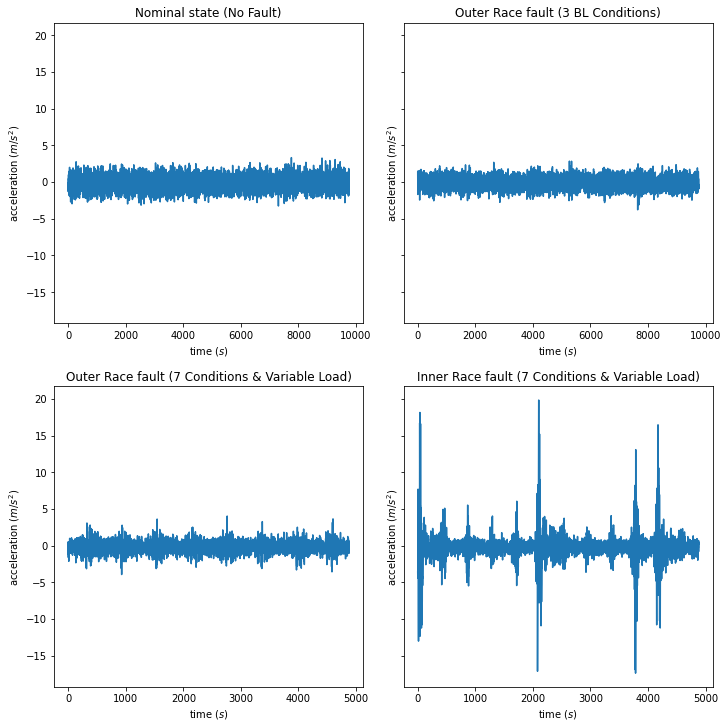

In [ ]:
rounded_psr_1 = int(psr1/10)
range_of_samples = range(0, rounded_psr_1)
rounded_psr_3 = int(psr3/10)
range_of_samples3 = range(0, rounded_psr_3)

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 10), constrained_layout=True)

axs[0, 0].plot(merged_G_3BL_data[range_of_samples])
axs[0, 0].set_title('Nominal state (No Fault)')

axs[0, 1].plot(merged_G_3OR_data[range_of_samples])
axs[0, 1].set_title('Outer Race fault (3 BL Conditions)')

axs[1, 0].plot(merged_G_7OR_data[range_of_samples3])
axs[1, 0].set_title('Outer Race fault (7 Conditions & Variable Load)')

axs[1, 1].plot(merged_G_7IR_data[range_of_samples3])
axs[1, 1].set_title('Inner Race fault (7 Conditions & Variable Load)')

for ax in axs.flat:
    ax.set(xlabel='time $(s)$', ylabel='acceleration $(m/s^2)$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
    #ax.label_outer()

In [ ]:
display(Gdata1.flatten())
display(len(Gdata3.flatten()))

array([ 0.8315881,  0.0387017,  0.4676445, ..., -0.8111974, -0.3338806,
       -0.4876291])

146484

In [ ]:
label = ['NominalFixedL', 'ORFixedL', 'ORVariableL', 'IRVariableL']

Building the CNN -
1. Data Chunking - 
  *   Divide the signal in chunks of size chunk_size, and take a subset 
  number_of_chunks from all the available for training and testing the CNN.
  *   A chunk is simply a sequential subset of the time series data with a fixed length - the chunk_size.
  *   Every chunk is distinct - no overlapping samples in different chunks.
  *   This method is tumbling time windowing
  *   Each time series is an array, and they have slight difference in length. 
  *   If a chunk size is fixed to divide the file, a function is needed to split the data exaclty in number_of_chunks of chunk_size and get rid of the remaining part. 

A function, split_exact, which takes the array to be splitted, the number of chunks and the array axis to be splitted.

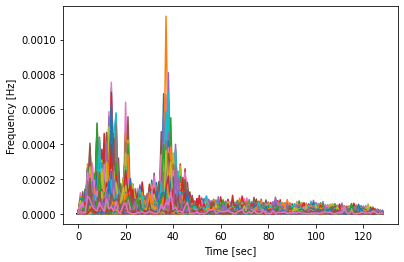

In [ ]:
from scipy import signal
f, t, Sxx = signal.spectrogram(merged_G_3BL_data.flatten(), psr1)
plt.plot(Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
def split_exact(x, n_chunks=2, axis=1):
    import numpy as np
    l = np.shape(x)[axis]
    x_split = x
    if l > n_chunks > 1:
        n = n_chunks
        if axis == 0:
            x_split = np.split(x[:-(l % n)], n, axis=axis)
        elif axis == 1:
            x_split = np.split(x[:, :-(l % n)], n, axis=axis)
    return x_split

In [ ]:
import numpy as np

def g_data_load(gdata, chunk_size=128):
    """
    Change loaded mat files and splits it in chunks of size chunk_size
    """
    y_n: ndarray = np.array([])
    # signal
    x = gdata.flatten()
    x = x / np.std(x)
    y_n = np.append(y_n, x)
    n_splits = len(y_n) // chunk_size
    print(n_splits)
    y_n = split_exact(y_n, n_chunks=n_splits, axis=0)

    return y_n

Function for loading g data in CHUNKS

In [ ]:
chunk_size_1 = rounded_psr_1
number_of_chunks_1 = chunk_size_1 + 200

chunk_size_2 = rounded_psr_3
number_of_chunks_2 = chunk_size_2 + 200

nominal_data_clean = g_data_load(merged_G_3BL_data, chunk_size=chunk_size_1) 
or_data_fixed_clean =  g_data_load(merged_G_3OR_data, chunk_size=chunk_size_1)
or_data_var_clean =  g_data_load(merged_G_7OR_data, chunk_size=chunk_size_2)
ir_data_var_clean =  g_data_load(merged_G_7IR_data, chunk_size=chunk_size_2)

display(len(nominal_data_clean))

180
180
210
210


180

2. Feature Engineering

  i. Each chunk of data is preprocessed. 
 
  ii. A time/fequency image of each chunk is extracted with three different preprocessing techniques. 
 
  iii. For all the images a min max normalization is used, to have color mapping only in the range [0,1].

In [ ]:
def min_max_norm(ary):
    ary = (ary - ary.min()) / np.abs(ary.max() - ary.min())
    return ary

3. Short Time Fourier Transform

The function generate_spectrogram_image(data_y_vector, image_shape) takes a time series as input and the resolution of the image that it will generate and returns the Short time Fourier normalized in the range [0,1].

In [ ]:
from scipy import signal
from skimage.transform import resize

def generate_spectrogram_image(data_y_vector, image_shape, fs):
    """
    Calculate the spectrogram of an array data_y_vector and resize it in 
    the image_shape resolution
    """
    data_y_vector_len = np.shape(data_y_vector)[0]

    f, t, sxx = signal.spectrogram(
        data_y_vector,
        fs)

    sxx = min_max_norm(sxx)
    sxx = resize(sxx, image_shape, mode='constant', anti_aliasing=True)

    return sxx

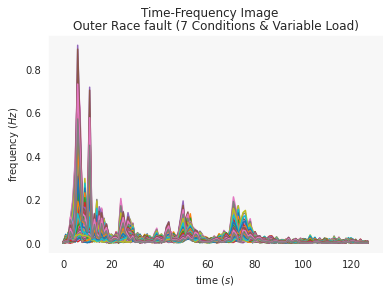

In [ ]:
plt.xlabel("time $(s)$")
plt.ylabel("frequency $(Hz)$")
plt.title('Outer Race fault (7 Conditions & Variable Load)')
plt.plot(generate_spectrogram_image(or_data_var_clean[1], (128, 128), psr3))
plt.suptitle('Time-Frequency Image')
plt.show()

A look at the Short Time Fourier Transform of a chunk of the data Nominal, Fixed OR, Variable OR and Variable IR:

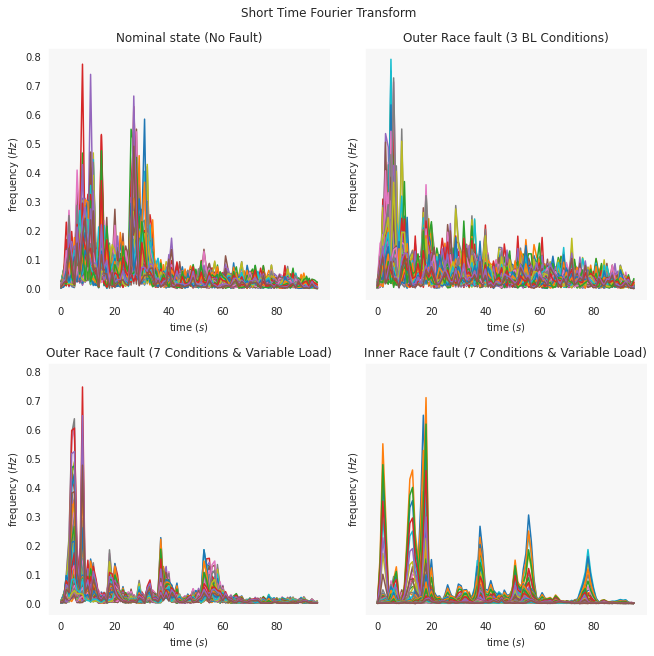

In [ ]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(9, 9), constrained_layout=True)
fig.suptitle('Short Time Fourier Transform')

axs[0, 0].plot(generate_spectrogram_image(nominal_data_clean[1], (96, 96), psr1))
axs[0, 0].set_title('Nominal state (No Fault)')

axs[0, 1].plot(generate_spectrogram_image(or_data_fixed_clean[1], (96, 96), psr1))
axs[0, 1].set_title('Outer Race fault (3 BL Conditions)')

axs[1, 0].plot(generate_spectrogram_image(or_data_var_clean[1], (96, 96), psr3))
axs[1, 0].set_title('Outer Race fault (7 Conditions & Variable Load)')

axs[1, 1].plot(generate_spectrogram_image(ir_data_var_clean[1], (96, 96), psr3))
axs[1, 1].set_title('Inner Race fault (7 Conditions & Variable Load)')

for ax in axs.flat:
    ax.set(xlabel='time $(s)$', ylabel='frequency $(Hz)$')


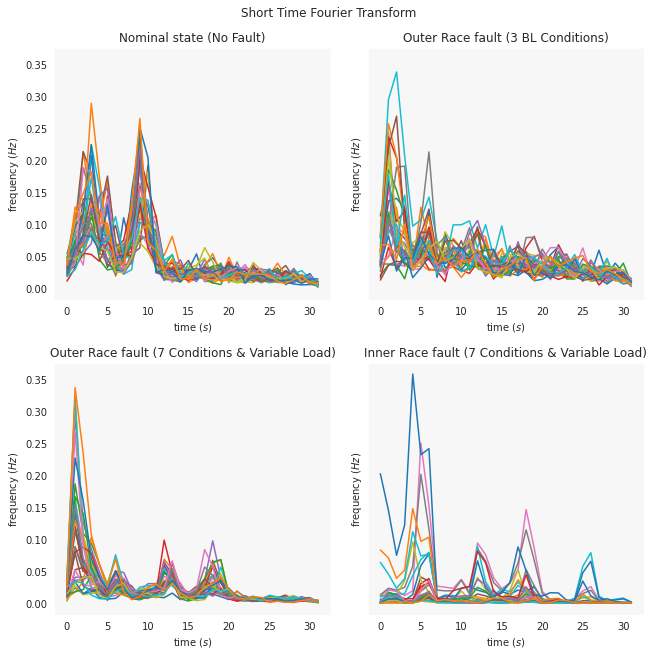

In [ ]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(9, 9), constrained_layout=True)
fig.suptitle('Short Time Fourier Transform')

axs[0, 0].plot(generate_spectrogram_image(nominal_data_clean[1], (32, 32), psr1))
axs[0, 0].set_title('Nominal state (No Fault)')

axs[0, 1].plot(generate_spectrogram_image(or_data_fixed_clean[1], (32, 32), psr1))
axs[0, 1].set_title('Outer Race fault (3 BL Conditions)')

axs[1, 0].plot(generate_spectrogram_image(or_data_var_clean[1], (32, 32), psr3))
axs[1, 0].set_title('Outer Race fault (7 Conditions & Variable Load)')

axs[1, 1].plot(generate_spectrogram_image(ir_data_var_clean[1], (32, 32), psr3))
axs[1, 1].set_title('Inner Race fault (7 Conditions & Variable Load)')

for ax in axs.flat:
    ax.set(xlabel='time $(s)$', ylabel='frequency $(Hz)$')


4. Data shuffling
  * Create several images to use to train the CNN.
  * Some functions needed to help in creating the folders in which the images will be stored, and to label correctly the file generated, depending on the parameters chosen, such as number_of_chunks, chunk_size, image_shape in dpi.
  * A random shuffling implemented between the chunks at this stage, to avoid that the CNN is trained on images that are representative of adjacent time windows.


In [ ]:
def try_make_directories():     
    data_directories = ["dataset", "npy_dataset"]
    for directory in data_directories:
        try:
            os.makedirs(f'./{directory}')
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

In [ ]:
from tqdm import tqdm
from enum import Enum
#
def create_image_by_label_database(
        number_of_chunks,
        chunk_size,
        image_types,
        image_shape,
        noise_scale = 0.0,
        shuffle_chunks_across_time=True,
        overwrite_existing_file=False):

    try_make_directories()

    filename_for_images_by_labels = npy_dataset_filename(
        number_of_chunks,
        chunk_size,
        image_types,
        image_shape,
        noise_scale,
        shuffle_chunks_across_time
    )

    if overwrite_existing_file is False:
        import os
        if os.path.isfile(filename_for_images_by_labels):
            print(
                "File already exists. Use 'overwrite_existing_file' if you wish to regenerate and overwrite it. Bye.")
            return
#
    #run the cell titled load g data
    len_n = np.shape(nominal_data_clean)[0]
    display(len_n)
    len_or_f = np.shape(or_data_fixed_clean)[0]
    len_data = min(len_n, len_or_f, number_of_chunks_1)
    
    len_or_v = np.shape(or_data_var_clean)[0]
    len_ir = np.shape(ir_data_var_clean)[0]
    len_data_2 = min(len_or_v, len_ir, number_of_chunks_2)

    # add some noise 
    nominal_data = [x + y for x, y in zip(nominal_data_clean, [np.random.normal(0, noise_scale, chunk_size_1) for i in range(len_n)])]
    or_data_fixed = [x + y for x, y in zip(or_data_fixed_clean, [np.random.normal(0, noise_scale, chunk_size_1) for i in range(len_or_f)])]
    or_data_var = [x + y for x, y in zip(or_data_var_clean, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_or_v)])]
    ir_data_var = [x + y for x, y in zip(ir_data_var_clean, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_ir)])]
    
    if shuffle_chunks_across_time:
        # so the first N chunks will be taken at random time from the whole time window
        np.random.shuffle(nominal_data)
        np.random.shuffle(or_data_fixed)
        np.random.shuffle(or_data_var)
        np.random.shuffle(ir_data_var)
        

    images_by_labels = {'n': [], 'orf': [], 'orv': [], 'irv': []}
    #1st Sampling Rate
    for i in tqdm(np.arange(len_data)):
        n_images = generate_rgba_images_from_data(nominal_data[i], image_shape, image_types, psr1)
        or_fixed_images = generate_rgba_images_from_data(or_data_fixed[i], image_shape, image_types, psr1)        

        images_by_labels['n'].extend(n_images)
        images_by_labels['orf'].extend(or_fixed_images)

    print(f'Saving {filename_for_images_by_labels}')
    np.save(f'{filename_for_images_by_labels}', images_by_labels)
    #2ndSampling Rate
    for i in tqdm(np.arange(len_data_2)):
        or_var_images = generate_rgba_images_from_data(or_data_var[i], image_shape, image_types, psr2)
        ir_images = generate_rgba_images_from_data(ir_data_var[i], image_shape, image_types, psr2)
        
        images_by_labels['orv'].extend(or_var_images)
        images_by_labels['irv'].extend(ir_images)
        

    print(f'Saving {filename_for_images_by_labels}')
    np.save(f'{filename_for_images_by_labels}', images_by_labels)
#
def npy_dataset_filename(
        number_of_chunks,
        chunk_size,
        image_types,
        image_shape,
        noise_scale,
        chunks_are_shuffled_across_time):
    filename_suffix = \
        f'__chunks={number_of_chunks}' \
        f'_size={chunk_size}' \
        f'_types{"-".join([str(t)[10:12] for t in image_types])}' + \
        (f'_noise{noise_scale}' if noise_scale > 0 else '') + \
        (f'_timeshuffled' if chunks_are_shuffled_across_time else '') + \
        f'_shape{image_shape[0]}-{image_shape[1]}'
    filename = f'./npy_dataset/images_by_labels_for_cnn{filename_suffix}.npy'
    return filename
#
#
def generate_rgba_images_from_data(
        vector_y_data,
        image_shape,
        image_types, fs2):
    images = []
    if ImageType.SCALOGRAM in image_types:
        images.append(generate_scalogram_image(vector_y_data, image_shape, fs2))
    if ImageType.SPECTROGRAM in image_types:
        images.append(generate_spectrogram_image(vector_y_data, image_shape, fs2))
    if ImageType.QTRANSFORM in image_types:
        images.append(generate_qtransform_image(vector_y_data, image_shape, fs2))

    images_rgba = ary_to_rgba(images)

    return images_rgba
#
#
def ary_to_rgba(ary, nchannels=4):
    from matplotlib import cm

    ary_dim = (np.shape(ary))

    im = np.empty(shape=(ary_dim[0], ary_dim[1], ary_dim[2], nchannels)).astype('uint8')
    for i in np.arange(0, len(ary)):
        im[i, :] = cm.ScalarMappable(cmap='viridis').to_rgba(10 * np.log(ary[i] + 0.001), bytes=True, norm=True)
    return im
#

class ImageType(Enum):
    SCALOGRAM = 1
    SPECTROGRAM = 2
    QTRANSFORM = 3

In [ ]:
chunk_size = chunk_size_1
number_of_chunks= number_of_chunks_1
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
shuffle_chunks_across_time=True

In [ ]:
create_image_by_label_database(
    number_of_chunks=number_of_chunks_1, 
    chunk_size=chunk_size_1, 
    image_types=image_types, 
    image_shape=image_shape, 
    shuffle_chunks_across_time=shuffle_chunks_across_time,
    overwrite_existing_file=True)

180

  5%|▌         | 11/210 [00:00<00:01, 107.95it/s]

Saving ./npy_dataset/images_by_labels_for_cnn__chunks=9965_size=9765_typesSP_timeshuffled_shape96-96.npy


100%|██████████| 210/210 [00:01<00:00, 136.42it/s]


Saving ./npy_dataset/images_by_labels_for_cnn__chunks=9965_size=9765_typesSP_timeshuffled_shape96-96.npy


In [ ]:
chunk_size = chunk_size_2
number_of_chunks= number_of_chunks_2
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
shuffle_chunks_across_time=True

In [ ]:
create_image_by_label_database(
    number_of_chunks=number_of_chunks_2, 
    chunk_size=chunk_size, 
    image_types=image_types, 
    image_shape=image_shape, 
    shuffle_chunks_across_time=shuffle_chunks_across_time,
    overwrite_existing_file=True)

  7%|▋         | 15/210 [00:00<00:01, 147.56it/s]

Saving ./npy_dataset/images_by_labels_for_cnn__chunks=5082_size=4882_typesSP_timeshuffled_shape96-96.npy


100%|██████████| 210/210 [00:01<00:00, 161.94it/s]


Saving ./npy_dataset/images_by_labels_for_cnn__chunks=5082_size=4882_typesSP_timeshuffled_shape96-96.npy


CNN
1. Preparing data Train and Test 

  A function that loads the images generated. Parameters repeated here for the file generation, restart the notebook directly from here.

In [ ]:
chunk_size = chunk_size_1
number_of_chunks= number_of_chunks_1
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
shuffle_chunks_across_time=True

In [ ]:
def load_images_by_labels_by_params(
        number_of_chunks,
        chunk_size,
        image_types ,
        image_shape,
        noise_scale = 0.0,
        chunks_are_shuffled_across_time=True):
    filename = npy_dataset_filename(
        number_of_chunks,
        chunk_size,
        image_types,
        image_shape,
        noise_scale,
        chunks_are_shuffled_across_time)

    loaded = np.load(filename, allow_pickle=True)
    print(f"Successfully loaded file {filename}")
    return loaded.item()  # item() gets the actual dictionary from the loaded object

Images loaded with the aid of the previous Function

In [ ]:
images_by_labels_for_cnn = load_images_by_labels_by_params(
    chunk_size=chunk_size, 
    number_of_chunks=number_of_chunks,     
    image_types=image_types, 
    image_shape=image_shape,
    chunks_are_shuffled_across_time = shuffle_chunks_across_time)

Successfully loaded file ./npy_dataset/images_by_labels_for_cnn__chunks5082_size4882_typesSP_timeshuffled_shape96-96.npy


2. To transform the data to a form suitable for feeding to the CNN:

  (i). separate the images and their labels into two arrays, correlated by their indexes

  (ii). have the labels one-hot encoded (i.e. label "N" becomes (0,0,1))

  (iii). Additionally, to get a good distribution of data types accross the training and test data, interleave the three types of data, that is to get a single array, containing all the images, where sequential images are always having a different data type (N, OR_F, OR_V, or IR) in the form [ ..., "N", "OR_F", "OR_V", "IR", "N", "OR_F", "OR_V", "IR", ...]. 

  (iv). This is implemented in the function separate_images_from_labels:

In [ ]:
def separate_images_from_labels(images_by_labels, interleave: bool):
    all_labels = list(images_by_labels.keys())
    NB_CLASSES = len(all_labels)
    all_labels_onehot = np.identity(NB_CLASSES).astype('uint8')
    label_to_onehot_mapper = {all_labels[i]: all_labels_onehot[i] for i in np.arange(NB_CLASSES)}

    all_images_for_cnn = []
    all_labels_for_cnn_onehot = []

    for key in all_labels:
        images = images_by_labels[key]
        labels_onehot = np.full(shape=(len(images), NB_CLASSES), fill_value=label_to_onehot_mapper[key])

        all_images_for_cnn.append(images)
        all_labels_for_cnn_onehot.append(labels_onehot)

    if interleave:
        all_images_for_cnn = lists_interleave(all_images_for_cnn)
        all_labels_for_cnn_onehot = lists_interleave(all_labels_for_cnn_onehot)
    else:  # flatten the lists
        all_images_for_cnn = [image for sublist in all_images_for_cnn for image in sublist]
        all_labels_for_cnn_onehot = [label for sublist in all_labels_for_cnn_onehot for label in sublist]

    return np.array(all_images_for_cnn), np.array(all_labels_for_cnn_onehot)
                               
def lists_interleave(lists):
    return [val for tup in zip(*lists) for val in tup]

The last step before training is to separate the images into training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split

images_for_cnn, labels_for_cnn_onehot = separate_images_from_labels(images_by_labels_for_cnn, interleave=True)
display(labels_for_cnn_onehot)
images_train, images_test, labels_train_onehot, labels_test_onehot = \
    train_test_split(
        images_for_cnn, 
        labels_for_cnn_onehot, 
        test_size=0.33, 
        random_state=42)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

3. CNN model with Keras

  (a) The problem - a supervised classification problem, with 4 classes. Convolutional Neural Networks implemented as Sequential Keras model. Here Keras exploits TensorFlow as backend for the tensor arithmetics.

  (b) The images that previously generated form a tuple (number of images, x dpi, y dpi, number of channels). 
  
  (c) Categorical cross-entropy loss function and ADAM optimizer and Leaky RELU activation function. 
  
  (d) The learning rate has been found by using cyclical learning rate algorithm of Smith. An implementation of the algorithm by Keras callback is in the ./colab folder.

In [ ]:
from keras import optimizers

## input data parameters
IMAGES_SHAPE = (96, 96, 4)
PADDING = 'same'
KERNEL_SIZE = (5, 5)
KERNEL_INITIALIZER = 'glorot_normal'
# parameters for deep layers
NUMBER_OF_CLASSES = 4  # "N", "OR_F", "OR_V", "IR"
DROPOUT = 0.5
LEAK_ALPHA = 0.1  #Learning rate?
MAX_POOLING_POOL_SIZE = (2, 2)
ACTIVATION_LAYER_FUNCTION = 'softmax'
# loss and optimizer
LOSS_FUNCTION = 'categorical_crossentropy'
LEARNING_RATE = 0.001  #Learning rate alpha
OPTIMIZER = optimizers.Adam(LEARNING_RATE, epsilon=10e-6)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras import metrics


# CNN architecture from Guo et al.
model = Sequential()
model.add(Conv2D(5, KERNEL_SIZE,                  
                 input_shape=IMAGES_SHAPE,
                 data_format='channels_last',
                 kernel_initializer=KERNEL_INITIALIZER,                 
                 padding=PADDING))
model.add(LeakyReLU(LEAK_ALPHA))
model.add(Conv2D(10, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))
model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Conv2D(10, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))
model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Flatten())
model.add(Dense(10))
model.add(LeakyReLU(LEAK_ALPHA))
model.add(Dense(5))
model.add(LeakyReLU(LEAK_ALPHA))
model.add(Dropout(DROPOUT))
model.add(Dense(NUMBER_OF_CLASSES))
model.add(Activation(ACTIVATION_LAYER_FUNCTION))
  
model.compile(loss=LOSS_FUNCTION, 
              optimizer=OPTIMIZER,
              metrics=[metrics.categorical_accuracy])  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 5)         505       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 10)        1260      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 10)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 10)        2510      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 10)        0

4. Training the CNN

Train the CNN with a validation split of 1/4 of the image batch size and over 30 epochs. The CNN will be then tested on the hold-out data.

In [ ]:
BATCH_SIZE = 64
NUMBER_OF_EPOCHS = 5
VALIDATION_SPLIT = 0.25

history = model.fit(
    images_train, labels_train_onehot,
    batch_size=BATCH_SIZE,
    epochs=NUMBER_OF_EPOCHS, 
    validation_split=VALIDATION_SPLIT, 
    verbose=1)

Epoch 1/5
6/6 [==============================] - 0s 66ms/step - loss: 13.2184 - categorical_accuracy: 0.2659 - val_loss: 2.7466 - val_categorical_accuracy: 0.2645
Epoch 2/5
6/6 [==============================] - 0s 18ms/step - loss: 7.8383 - categorical_accuracy: 0.2548 - val_loss: 4.0494 - val_categorical_accuracy: 0.2645
Epoch 3/5
6/6 [==============================] - 0s 18ms/step - loss: 5.8024 - categorical_accuracy: 0.2327 - val_loss: 12.2780 - val_categorical_accuracy: 0.2562
Epoch 4/5
6/6 [==============================] - 0s 17ms/step - loss: 6.8554 - categorical_accuracy: 0.2770 - val_loss: 5.1475 - val_categorical_accuracy: 0.2645
Epoch 5/5
6/6 [==============================] - 0s 18ms/step - loss: 6.3410 - categorical_accuracy: 0.2161 - val_loss: 2.1721 - val_categorical_accuracy: 0.2231


5. Test the CNN

Once the model has been fitted, its precision is assessed through a classical one vs many confusion matrix.

In [ ]:
labels_predicted = history.model.predict_classes(images_test, verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
8/8 [==============================] - 0s 9ms/step


In [ ]:
# for the confusion matrix we need a factorized labels 
# [1,0,0,0] -> 0 ("N")
# [0,1,0,0] -> 2 ("OR_F")
# [0,0,1,0] -> 2 ("OR_V")
# [0,0,0,1] -> 1 ("IR")

labels_test_factorized = [(1*label[0]+2*label[1]+3*label[2]+4*label[3])-1 for label in labels_test_onehot]

from sklearn.metrics import classification_report
print(classification_report(labels_test_factorized, labels_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00        54
           2       0.29      0.87      0.44        63
           3       0.06      0.05      0.06        59

    accuracy                           0.24       238
   macro avg       0.09      0.23      0.12       238
weighted avg       0.09      0.24      0.13       238



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. ROC analysis

The ROC curves for each class give a complete picture of the classification performance of the CNN. It is convenient to write a function that takes this task.

In [ ]:
def ROC(model, X_test, y_test, n_class):
    import seaborn as sns
    from sklearn.metrics import roc_curve, roc_auc_score, auc
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    
    
    sns.set_style("dark",{"axes.facecolor": ".97"})
    # Predict the labels of the test set: y_pred
    y_pred = model.predict_classes(X_test)

    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)
    y_test_binary = label_binarize(y_test, classes=range(0, n_class))

    y_test_normal = y_test_binary[:, 0]
    y_prob_normal = y_pred_prob[:, 0]

    y_test_outer_race_fixed = y_test_binary[:, 1]
    y_prob_outer_race_fixed = y_pred_prob[:, 1]

    y_test_outer_race_variable = y_test_binary[:, 2]
    y_prob_outer_race_variable = y_pred_prob[:, 2]

    y_test_inner_race = y_test_binary[:, 3]
    y_prob_inner_race = y_pred_prob[:, 3]
    
    lw = 1.5
    
    # Compute and print the confusion matrix and classification report
    confusion_matrix(y_test, y_pred)

    from itertools import cycle
    # Compute ROC curve and ROC area for each class
 

    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()

    fpr[0], tpr[0], thresholds[0] = roc_curve(y_test_normal, y_prob_normal)
    fpr[1], tpr[1], thresholds[1] = roc_curve(y_test_outer_race_fixed, y_prob_outer_race_fixed)
    fpr[2], tpr[2], thresholds[2] = roc_curve(y_test_outer_race_variable, y_prob_outer_race_variable)
    fpr[3], tpr[3], thresholds[3] = roc_curve(y_test_inner_race, y_prob_inner_race)

    for i in range(4):
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(4, 4), dpi=150)

    colors = cycle(['black','blue', 'red', 'green'])
    for i, color in zip(range(4), colors):
        plot_label=['N','OR_F','OR_V','IR']  # "N", "OR_F", "OR_V", "IR"
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(plot_label[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=.7)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", prop={'size': 8})
    plt.show()



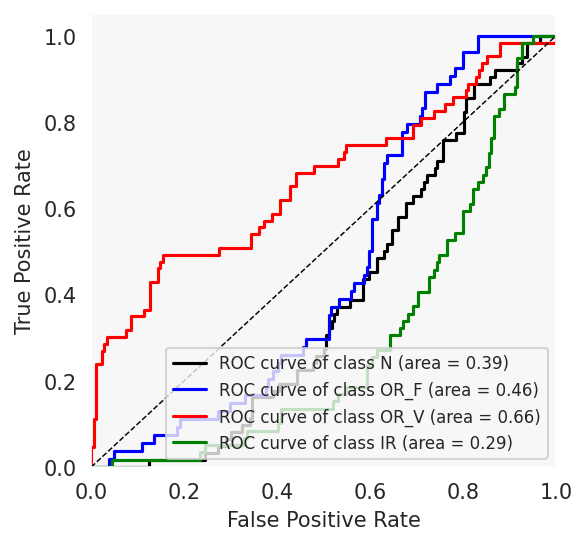

In [ ]:
ROC(history.model, images_test, labels_test_factorized, 4)